### Dataset Detailing:-

#### We’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from theInternet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews. i am going to use Deep Learning technique to make model.

#### Import Dependencies

In [1]:
import pandas
import numpy
import keras
import warnings
import tensorflow
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

#### Loading Dataset

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data.shape

(25000,)

In [5]:
train_labels.shape

(25000,)

In [6]:
test_data.shape

(25000,)

In [7]:
test_labels.shape

(25000,)

In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [10]:
train_labels[0] # 0 class stands for Negative Review

1

In [11]:
train_labels[1] # 1 class stands for Postive Review

0

In [12]:
max([max(sequence) for sequence in train_data])

9999

In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#### Preparing Data

In [14]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Model Building

In [17]:
from keras import models
from keras import layers

In [18]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Compiling Model

In [19]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

#### Configuring Optimizer

In [20]:
#from keras.optimizers import rmsprop_v2

#### Validating My Approach

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [22]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training Model

In [23]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5257 - accuracy: 0.7700 - val_loss: 0.3931 - val_accuracy: 0.8732
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3096 - accuracy: 0.8991 - val_loss: 0.3046 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2187 - accuracy: 0.9301 - val_loss: 0.3398 - val_accuracy: 0.8606
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1738 - accuracy: 0.9447 - val_loss: 0.3051 - val_accuracy: 0.8772
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1442 - accuracy: 0.9552 - val_loss: 0.2872 - val_accuracy: 0.8845
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1150 - accuracy: 0.9657 - val_loss: 0.3097 - val_accuracy: 0.8806
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0990 - accuracy: 0.9693 - val_loss: 0.3183 - val_accuracy: 0.8827
Epoch 8/20
30

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.metrics_names

['loss', 'accuracy']

#### Model Evaluation

In [28]:
losses  = pd.DataFrame(model.history.history)

In [29]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.525703,0.770000,0.393092,0.8732
1,0.309579,0.899133,0.304621,0.8854
2,0.218700,0.930067,0.339844,0.8606
3,0.173779,0.944733,0.305065,0.8772
4,0.144175,0.955200,0.287174,0.8845


#### Plotting Accuracy Vs Val_accuracy

<AxesSubplot:>

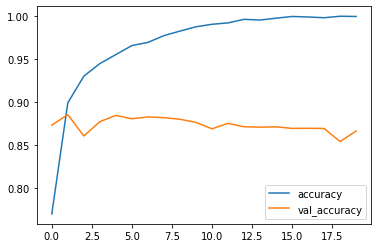

In [30]:
losses[['accuracy','val_accuracy']].plot()

#### Plotting Loss Vs Val_loss

<AxesSubplot:>

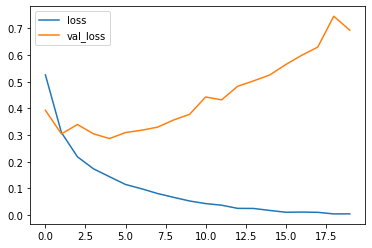

In [32]:
losses[['loss', 'val_loss']].plot()

#### Retraining Model from scrach

In [33]:
# Again Building Model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# Compiling Model Again
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
# Again Training Model
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 19ms/step - loss: 0.4631 - accuracy: 0.8172
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2645 - accuracy: 0.9108
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2033 - accuracy: 0.9271
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3039 - accuracy: 0.8790


In [34]:
results

[0.303879976272583, 0.8790000081062317]

#### Predictions on New Brand Data

In [35]:
predictions = model.predict(x_test)

In [36]:
predictions[0].shape

(1,)

In [37]:
np.sum(predictions[0])

0.13481286

# Great Job!